In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tflearn
import tensorflow as tf
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [4]:
# The competition datafiles are in the directory ../input
# Read competition data files:
train = pd.read_csv("./train.csv")
test  = pd.read_csv("./test.csv")

print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))
print("Train set has {0[0]} rows and {0[1]} columns".format(train.shape))

Test set has 28000 rows and 784 columns
Train set has 42000 rows and 785 columns


index shape             -> (1, 1)
index                   -> [1]
row with index shape    -> (785,)
row without index shape -> (784,)
Image shape             -> (28, 28)


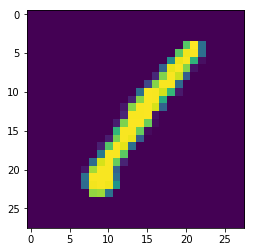

In [5]:
for x in range(1, 2):
    A=np.array(train[x-1:x])
    c=np.resize(A,(1,1))
    print('index shape             ->',c.shape)
    print('index                   ->',c.ravel())
    rowWithIndex = A.ravel()#scalar 785    
    print('row with index shape    ->',rowWithIndex.shape)
    rowWithOutIndex = rowWithIndex[1:785:1]#scalar 784 skip the index for image
    print('row without index shape ->',rowWithOutIndex.shape)
    Image1=np.resize(rowWithOutIndex,(28,28))
    print('Image shape             ->',Image1.shape)
    plt.imshow(Image1, interpolation='nearest')
    plt.show()

In [6]:
# Split data into training set and validation set
y_train = train.ix[:,0].values #all input labels, first cloumn(index 0) of each row in the train csv file
trainX = train.ix[:,1:].values #remaining 784 values after(from index 1 till end) the first colum. 

print(y_train.shape)
print(trainX.shape)
#one hot encoded form of labels
y_train_one_hot = to_categorical(y_train)
print(y_train_one_hot)

(42000,)
(42000, 784)
[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [7]:
#DNN - input layer of 784 inputs, 4 hidden layers and a softmax layer at output
def build_model():
    tf.reset_default_graph()
    net = tflearn.input_data([None, 784])
    net = tflearn.fully_connected(net, 128, activation='ReLU')
    net = tflearn.fully_connected(net, 64, activation='ReLU')
    net = tflearn.fully_connected(net, 32, activation='ReLU')
    net = tflearn.fully_connected(net, 10, activation='softmax') 
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.1, loss='categorical_crossentropy')
    model = tflearn.DNN(net)
    return model
model = build_model()

In [8]:
#training
model.fit(trainX, y_train_one_hot, validation_set=0.1, show_metric=True, batch_size=300, n_epoch=10)


---------------------------------
Run id: ZDXXY4
Log directory: /tmp/tflearn_logs/
INFO:tensorflow:Summary name Accuracy/ (raw) is illegal; using Accuracy/__raw_ instead.
---------------------------------
Training samples: 37800
Validation samples: 4200
--


InternalError: Blas GEMM launch failed : a.shape=(300, 784), b.shape=(784, 128), m=300, n=128, k=784
	 [[Node: FullyConnected/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_InputData/X_0_0/_9, FullyConnected/W/read)]]
	 [[Node: Accuracy/Mean/_35 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_317_Accuracy/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'FullyConnected/MatMul', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-5940c5e8d0da>", line 12, in <module>
    model = build_model()
  File "<ipython-input-7-5940c5e8d0da>", line 5, in build_model
    net = tflearn.fully_connected(net, 128, activation='ReLU')
  File "/home/kiran/.local/lib/python3.5/site-packages/tflearn/layers/core.py", line 173, in fully_connected
    inference = tf.matmul(inference, W)
  File "/home/kiran/.local/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 1891, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/kiran/.local/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2437, in _mat_mul
    name=name)
  File "/home/kiran/.local/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/kiran/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/kiran/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(300, 784), b.shape=(784, 128), m=300, n=128, k=784
	 [[Node: FullyConnected/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_InputData/X_0_0/_9, FullyConnected/W/read)]]
	 [[Node: Accuracy/Mean/_35 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_317_Accuracy/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
#inference
testX = test.ix[:,0:].values
def prediction(predictions):
    return np.argmax(predictions,1)
predictions = prediction(model.predict(testX))

In [ ]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("submission.csv", index=False, header=True)
print(submissions)